In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
hdma_path = "../../../"
hdma_chrombpnet_path = hdma_path + "output/03-chrombpnet/"

In [27]:
import sys
import h5py
import numpy as np
import pandas as pd
import logomaker
import os

# display all outputs in a cell
get_ipython().ast_node_interactivity = 'all'

This notebook loads the h5 file contained the combined/merged modisco patterns, filters out the ones that
we have decided to drop after manual annotation, and then saves a new, filtered object to use downstream.

In [7]:
# first let's get the patterns to keep
patterns = pd.read_csv("04d-ChromBPNet_de_novo_motifs.tsv", sep="\t")
patterns.head()

,idx,pattern_class,pattern,total_n_seqlets,n_component_patterns,n_component_celltypes,n_component_organs,component_organs,component_celltypes,modisco_cwm_fwd,...,match5,qval5,match6,qval6,match7,qval7,match8,qval8,match9,qval9
0,1,pos,pos.Average_112__merged_pattern_0,192,5,5,3,"Brain,Lung,StomachEsophagus","dorsal radial glia,vascular endothelial,airway...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,pos,pos.Average_115__merged_pattern_0,105,2,2,2,"Lung,Skin","ciliated,fibroblast",NaN,...,CTCFL: M08885_2.00,0.181525,CTCFL: MA1102.2,0.181525,CTCF: MA1929.1,0.181525,CTCF: M07925_2.00,0.181525,CTCF: M07863_2.00,0.181525
2,3,pos,pos.Average_116__merged_pattern_0,47,2,2,2,"Muscle,Skin","smooth muscle,keratinocyte",NaN,...,JDP2: M04292_2.00,0.047633,CREB3L4: M04296_2.00,0.047633,CREB3: M04241_2.00,0.047633,CREM: M04229_2.00,0.047633,CREB1: M04258_2.00,0.047633
3,4,pos,pos.Average_131__merged_pattern_0,432,10,10,7,"Brain,Eye,Lung,Muscle,Skin,StomachEsophagus,Th...","excitatory neurons,trabecular meshwork,airway ...",NaN,...,TP53: M09337_2.00,1.000000,POU3F2: M05477_2.00,1.000000,ZNF565: M07700_2.00,1.000000,NRF1: M08177_2.00,1.000000,NRF1: MA0506.1,1.000000
4,5,pos,pos.Average_159__merged_pattern_0,535784,256,189,12,"Adrenal,Brain,Eye,Heart,Liver,Lung,Muscle,Skin...","adrenal cortex,excitatory neurons,dorsal radia...",NaN,...,ZNF454: M04572_2.00,0.052145,ZNF454: M04574_2.00,0.052145,ZNF611: M07759_2.00,0.412382,ZBTB14: M04631_2.00,0.451218,ZBTB14: M04632_2.00,0.451218


In [15]:
patterns = patterns[patterns.annotation != "drop"]
patterns_to_keep = patterns.pattern.values
len(patterns_to_keep)
patterns_to_keep[0:5]

742

array(['pos.Average_112__merged_pattern_0',
       'pos.Average_115__merged_pattern_0',
       'pos.Average_116__merged_pattern_0',
       'pos.Average_131__merged_pattern_0',
       'pos.Average_159__merged_pattern_0'], dtype=object)

In [17]:
compiled_h5 = hdma_chrombpnet_path + "02-compendium/modisco_compiled/modisco_compiled.h5"
filtered_h5 = hdma_chrombpnet_path + "02-compendium/modisco_compiled/modisco_compiled_filtered.h5"

# open the original HDF5 file in read mode and create a new HDF5 file in write mode
with h5.File(compiled_h5, "r") as old, h5.File(filtered_h5, "w") as new:

    # iterate over the top-level groups (pos_patterns and neg_patterns)
    for pattern_class in old.keys():
        original_group = old[pattern_class]
        
        # create the same structure in the new HDF5 file
        new_group = new.create_group(pattern_class)
        
        # only keep the specified patterns
        for pattern in patterns_to_keep:
            if pattern in original_group:
                
                new_group.create_group(pattern)
                new_group[pattern].create_dataset('contrib_scores', data=original_group[pattern]['contrib_scores'])
                new_group[pattern].create_dataset('sequence', data=original_group[pattern]['sequence'])
                new_group[pattern].create_dataset('hypothetical_contribs', data=original_group[pattern]['hypothetical_contribs'])
                new_group[pattern].create_dataset('seqlets/n_seqlets', data=original_group[pattern]['seqlets/n_seqlets'])
        
        print(f"Copied patterns to {pattern_class} in new HDF5 file: {list(new_group.keys())}")


<HDF5 group "/neg_patterns/neg.Average_12__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_12__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_12__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_12__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_12__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_12__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_12__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_12__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_12__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_12__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_14__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_15__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_15__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_16__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Average_16__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Heart__Heart_c1__neg_patterns.pattern_0__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Heart__Heart_c3__neg_patterns.pattern_1__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Lung__Lung_c1__neg_patterns.pattern_0__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Thymus__Average_4__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/neg_patterns/neg.Thymus__Average_6__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

Copied patterns to neg_patterns in new HDF5 file: ['neg.Average_12__merged_pattern_0', 'neg.Average_12__merged_pattern_1', 'neg.Average_12__merged_pattern_12', 'neg.Average_12__merged_pattern_2', 'neg.Average_12__merged_pattern_3', 'neg.Average_12__merged_pattern_4', 'neg.Average_12__merged_pattern_5', 'neg.Average_12__merged_pattern_6', 'neg.Average_12__merged_pattern_7', 'neg.Average_12__merged_pattern_8', 'neg.Average_14__merged_pattern_0', 'neg.Average_15__merged_pattern_0', 'neg.Average_15__merged_pattern_1', 'neg.Average_16__merged_pattern_0', 'neg.Average_16__merged_pattern_1', 'neg.Heart__Heart_c1__neg_patterns.pattern_0__merged_pattern_0', 'neg.Heart__Heart_c3__neg_patterns.pattern_1__merged_pattern_0', 'neg.Lung__Lung_c1__neg_patterns.pattern_0__merged_pattern_0', 'neg.Thymus__Average_4__merged_pattern_2', 'neg.Thymus__Average_6__merged_pattern_0']


<HDF5 group "/pos_patterns/pos.Average_112__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_115__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_116__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_131__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_159__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_159__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_159__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_159__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_161__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_161__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_161__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_161__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_161__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_161__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_161__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_161__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_190__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_251__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_207__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_207__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_293__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_17" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_20" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_251__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_24" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_25" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_26" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_190__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_296__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Spleen__Average_399__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_217__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_217__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_217__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_217__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_219__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_229__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_229__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_229__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_229__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_233__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_233__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_233__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_237__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_237__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_237__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_15" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_16" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_16" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_251__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_251__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_251__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_251__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_251__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_251__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_293__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_17" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_17" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_255__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_255__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_255__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_19" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_255__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_16" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_257__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_20" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_21" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_23" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_25" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_293__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_264__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_264__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_269__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_269__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_269__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_269__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_269__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_26__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_26__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_26__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_26__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_18" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_27" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_19" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_28" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_32" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_190__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_29" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_272__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_272__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_272__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_23" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_30" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_103" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_31" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_106" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_24" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_85__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_17" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Brain__Average_327__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_19" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_20" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_21" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_22" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_25" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_20" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_36" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_21" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_26" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_29" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_37" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Heart__Average_368__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_38" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_34" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Stomach__Average_553__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_23" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_39" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_190__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_40" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_27" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_28" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_30" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_31" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_251__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_41" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_48" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_253__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_190__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_51" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_54" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_55" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_56" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_57" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_59" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_62" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_33" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_35" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_42" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_69" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_70" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_17" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Thymus__Average_257__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_74" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_75" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_15" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_43" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_79" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_36" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_19" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_37" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_82" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_84" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_85" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_24" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_20" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_46" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_47" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_38" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_93" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_94" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_48" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_49" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_39" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_18" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_99" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_50" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_41" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_15" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_42" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_43" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_18" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_257__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_51" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_22" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_52" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_19" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_44" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_27" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_28" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Skin__Average_96__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_54" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_15" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_56" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Liver_c5__pos_patterns.pattern_20__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_37" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_39" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_41" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_42" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_44" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_45" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_46" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_47" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_48" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_282__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_282__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_282__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_282__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_282__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_282__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_15" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_282__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_282__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_282__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_57" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_285__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_285__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_26" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_58" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_59" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_46" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_29" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_30" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_289__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_60" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_15" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_16" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_47" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Skin__Skin_c9__pos_patterns.pattern_24__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_21" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_25" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_18" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_50" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_52" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_16" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_62" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_21" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_22" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_23" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Liver_c0__pos_patterns.pattern_26__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_25" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_26" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_27" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_282__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_80__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_30" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_31" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_32" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_28" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_35" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_36" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_65" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_38" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_66" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_22" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_42" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_43" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_32" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_33" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_17" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_305__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_290__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_290__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_290__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_290__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_69" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_290__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_291__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_23" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_293__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_293__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_207__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_293__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_293__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_18" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Skin__Skin_c3__pos_patterns.pattern_34__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_16" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_20" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_19" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_19" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_71" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_85__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Heart__Average_396__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_34" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_85__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_21" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_58" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_31" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_60" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_293__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_34" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_35" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_61" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_20" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_39" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_251__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Stomach__Stomach_c3__pos_patterns.pattern_29__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_63" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_35" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_36" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_35" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_66" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_24" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Eye__Average_488__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Average_401__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_18" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_67" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Skin__Skin_c0__pos_patterns.pattern_37__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_253__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_68" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Heart__Heart_c0__pos_patterns.pattern_35__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_296__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_296__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_296__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_296__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_22" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_296__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_296__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_296__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_296__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_296__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_296__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_78" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_71" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_28" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_15" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_16" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_301__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_18" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_23" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_272__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_21" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_22" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_23" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_24" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_72" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_26" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_27" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_73" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_29" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_29" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_30" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_34" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_82" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_37" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Brain__Brain_c6__pos_patterns.pattern_25__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_40" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_38" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_25" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_85__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_44" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_77" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_46" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_255__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_84" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_27" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_78" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_80" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Spleen__Average_402__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_81" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_53" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_55" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_57" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_34" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_296__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Lung__Lung_c4__pos_patterns.pattern_36__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_305__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_305__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_305__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_305__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_305__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_305__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_305__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_305__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_256__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_83" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_280__merged_pattern_40" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_26" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_27" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_15" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_41" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_42" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_18" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_43" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_22" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Liver_c4__pos_patterns.pattern_42__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_24" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_86" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_28" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_14" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_45" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_3" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_88" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_87" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_37" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_33" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_35" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_88" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_89" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_39" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_15" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_40" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_90" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Average_439__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_45" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_28" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_251__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_29" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_30" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_5" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_31" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_32" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_16" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_17" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_90" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_287__merged_pattern_12" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_40" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_47" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_48" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_91" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_258__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_63" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_271__merged_pattern_16" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_16" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_67" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_17" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_70" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_85__merged_pattern_7" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_72" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_76" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_77" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Heart__Heart_c2__pos_patterns.pattern_34__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_79" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_229__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_80" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Eye__Eye_c14__pos_patterns.pattern_14__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_83" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_248__merged_pattern_18" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_85" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_86" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_87" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_251__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_89" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_92" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_282__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_92" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_93" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_94" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_95" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_288__merged_pattern_41" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_49" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Spleen__Average_402__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_272__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_30__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_64__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_73__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_80__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_95" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_85__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_85__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_96" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_85__merged_pattern_11" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_97" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_50" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_51" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_52" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_85__merged_pattern_6" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_85__merged_pattern_8" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_100" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_98" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_54" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Eye__Average_488__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_96" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_85__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Eye__Eye_c11__pos_patterns.pattern_18__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Average_407__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Eye__Eye_c1__pos_patterns.pattern_37__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Eye__Eye_c8__pos_patterns.pattern_22__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Heart__Average_290__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Spleen__Spleen_c3__pos_patterns.pattern_40__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_101" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_282__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Heart__Heart_c0__pos_patterns.pattern_38__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_19" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Average_285__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_97" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Average_407__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Thyroid__Thyroid_c2__pos_patterns.pattern_33__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Average_439__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_102" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Average_46__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Average_478__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_104" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_290__merged_pattern_4" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Liver_c1__pos_patterns.pattern_38__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_37" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_20" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Lung__Lung_c0__pos_patterns.pattern_51__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Lung__Lung_c11__pos_patterns.pattern_40__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_98" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Muscle__Muscle_c18__pos_patterns.pattern_24__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_276__merged_pattern_105" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_289__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Skin__Skin_c0__pos_patterns.pattern_44__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Skin__Skin_c17__pos_patterns.pattern_23__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Skin__Skin_c18__pos_patterns.pattern_25__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Skin__Skin_c2__pos_patterns.pattern_45__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_293__merged_pattern_9" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Skin__Skin_c7__pos_patterns.pattern_42__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_38" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Spleen__Average_288__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Spleen__Average_288__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Spleen__Average_367__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Spleen__Average_367__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Spleen__Average_367__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_21" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Spleen__Average_399__merged_pattern_1" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Spleen__Average_399__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Spleen__Average_402__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_295__merged_pattern_22" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_58" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_100" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Stomach__Average_553__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_99" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Stomach__Average_553__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_85__merged_pattern_10" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Eye__Average_488__merged_pattern_2" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Thymus__Thymus_c2__pos_patterns.pattern_38__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Thymus__Thymus_c6__pos_patterns.pattern_44__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Thyroid__Thyroid_c2__pos_patterns.pattern_17__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Thyroid__Thyroid_c2__pos_patterns.pattern_20__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Thyroid__Thyroid_c2__pos_patterns.pattern_27__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_32" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_212__merged_pattern_33" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_286__merged_pattern_13" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_294__merged_pattern_40" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_60" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_61" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_303__merged_pattern_62" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Average_306__merged_pattern_101" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

<HDF5 group "/pos_patterns/pos.Liver__Liver_c11__pos_patterns.pattern_27__merged_pattern_0" (0 members)>

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

<HDF5 dataset "sequence": shape (30, 4), type "<f8">

<HDF5 dataset "hypothetical_contribs": shape (30, 4), type "<f8">

<HDF5 dataset "n_seqlets": shape (1,), type "<i8">

Copied patterns to pos_patterns in new HDF5 file: ['pos.Average_112__merged_pattern_0', 'pos.Average_115__merged_pattern_0', 'pos.Average_116__merged_pattern_0', 'pos.Average_131__merged_pattern_0', 'pos.Average_159__merged_pattern_0', 'pos.Average_159__merged_pattern_3', 'pos.Average_159__merged_pattern_5', 'pos.Average_159__merged_pattern_6', 'pos.Average_161__merged_pattern_0', 'pos.Average_161__merged_pattern_1', 'pos.Average_161__merged_pattern_2', 'pos.Average_161__merged_pattern_3', 'pos.Average_161__merged_pattern_4', 'pos.Average_161__merged_pattern_5', 'pos.Average_161__merged_pattern_6', 'pos.Average_161__merged_pattern_7', 'pos.Average_190__merged_pattern_0', 'pos.Average_190__merged_pattern_1', 'pos.Average_190__merged_pattern_2', 'pos.Average_190__merged_pattern_3', 'pos.Average_190__merged_pattern_4', 'pos.Average_207__merged_pattern_0', 'pos.Average_207__merged_pattern_1', 'pos.Average_207__merged_pattern_2', 'pos.Average_212__merged_pattern_0', 'pos.Average_212__merged

In [18]:
# check that this looks correct
modisco_obj = h5py.File(filtered_h5)

In [21]:
modisco_obj['neg_patterns'].keys()

<KeysViewHDF5 ['neg.Average_12__merged_pattern_0', 'neg.Average_12__merged_pattern_1', 'neg.Average_12__merged_pattern_12', 'neg.Average_12__merged_pattern_2', 'neg.Average_12__merged_pattern_3', 'neg.Average_12__merged_pattern_4', 'neg.Average_12__merged_pattern_5', 'neg.Average_12__merged_pattern_6', 'neg.Average_12__merged_pattern_7', 'neg.Average_12__merged_pattern_8', 'neg.Average_14__merged_pattern_0', 'neg.Average_15__merged_pattern_0', 'neg.Average_15__merged_pattern_1', 'neg.Average_16__merged_pattern_0', 'neg.Average_16__merged_pattern_1', 'neg.Heart__Heart_c1__neg_patterns.pattern_0__merged_pattern_0', 'neg.Heart__Heart_c3__neg_patterns.pattern_1__merged_pattern_0', 'neg.Lung__Lung_c1__neg_patterns.pattern_0__merged_pattern_0', 'neg.Thymus__Average_4__merged_pattern_2', 'neg.Thymus__Average_6__merged_pattern_0']>

In [36]:
len(modisco_obj['pos_patterns'].keys())

722

In [34]:
modisco_obj['pos_patterns']['pos.Average_306__merged_pattern_1'].keys()
modisco_obj['pos_patterns']['pos.Average_306__merged_pattern_1']['contrib_scores'][()]

<KeysViewHDF5 ['contrib_scores', 'hypothetical_contribs', 'seqlets', 'sequence']>

array([[ 2.00078729e-04,  1.70384791e-03,  1.81830139e-03,
         9.78267330e-04],
       [ 1.40478319e-04,  1.87089228e-03,  1.63095215e-03,
         5.76457694e-04],
       [ 3.71845924e-04,  1.69704266e-03,  1.39124971e-03,
         3.71816120e-04],
       [ 3.22040375e-04,  1.82450780e-03,  1.16445869e-03,
         2.92751667e-04],
       [ 1.88725173e-04,  1.53890373e-03,  1.82179265e-03,
         2.20935600e-04],
       [ 2.88312844e-04,  1.69269347e-03,  1.42139359e-03,
         3.32037009e-04],
       [ 1.42745808e-04,  2.55045541e-03,  1.44968094e-03,
         1.76880952e-04],
       [ 8.03297423e-05,  3.49916901e-03,  1.31478131e-03,
         1.15046789e-04],
       [ 4.29160424e-05,  2.06061506e-03,  2.73937683e-03,
         1.55560233e-04],
       [ 5.55070226e-04,  1.72968612e-03,  2.07557653e-03,
         5.30906048e-05],
       [ 1.21241542e-03,  1.60212766e-03,  1.63825684e-03,
         4.64105882e-04],
       [ 2.90039258e-03,  1.44333084e-04,  3.09838109e-03,
      

Text(0, 0.5, 'Contrib (CWM)')

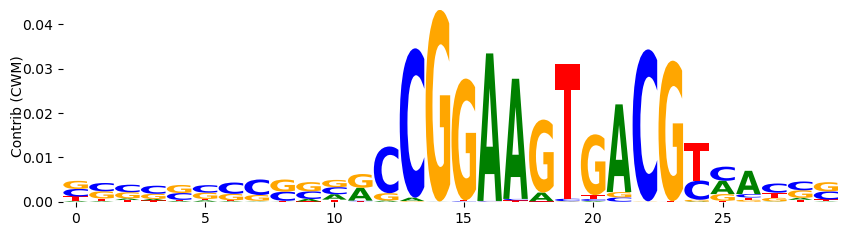

In [35]:
df1 = pd.DataFrame(modisco_obj['pos_patterns']['pos.Average_306__merged_pattern_1']['contrib_scores'], columns=["A", "C", "G", "T"])
logo1 = logomaker.Logo(df1)
logo1.style_spines(visible=False)
logo1.ax.set_ylabel("Contrib (CWM)", labelpad=-1)